In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the root directory of the project as credit-mlops
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(ROOT_DIR)

/workspaces/credit-mlops


In [8]:
# Read the processed data
df = pd.read_csv(os.path.join(ROOT_DIR, 'data', 'processed', 'processed_data.csv'))
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


## Features importance

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df)

In [11]:
# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_standardized)

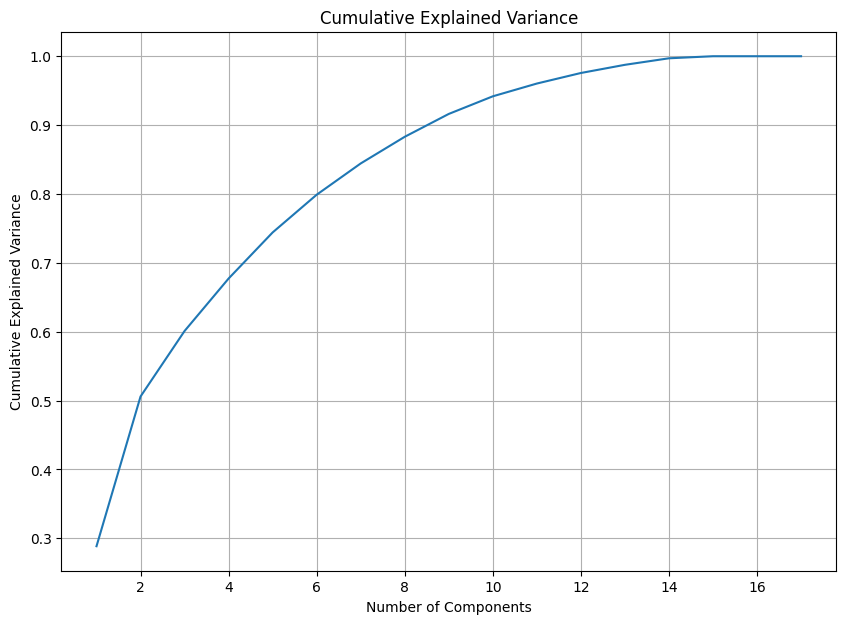

In [15]:
# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In the plot, the x-axis represents the number of principal components, and the y-axis represents the cumulative explained variance. This plot helps us decide how many principal components to keep. We typically want to keep enough components to explain a high percentage (e.g., 95%) of the variance.

From the plot, we can see that around 6 components are needed to explain about 80% of the variance in the data.

In [16]:
# Save the plot
plt.savefig(os.path.join(ROOT_DIR, 'reports', 'figures', 'pca.png'))

<Figure size 640x480 with 0 Axes>